In [1]:
import torch
import numpy as np

C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
tf.__version__

'2.6.0'

In [2]:
torch.__version__

'1.12.0'

In [3]:
x1 = torch.tensor([1, 2, 3])

torch.add(x1, x1), torch.div(x1, 3)

(tensor([2, 4, 6]), tensor([0.3333, 0.6667, 1.0000]))

In [4]:
x1 = [1, 2, 3]
x2 = [[2], [3], [4]]

np.dot(x1, x2)

array([20])

In [5]:
x1 = torch.tensor([1, 2, 3])
x2 = torch.tensor([[2], [3], [4]])

x1 @ x2, torch.matmul(x1, x2)

(tensor([20]), tensor([20]))

(0.4798874197428482, 0.8865742292268798)

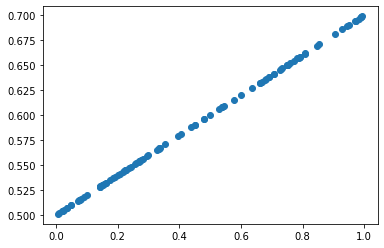

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.random.rand(100)
y = x * 0.2 + 0.5

plt.scatter(x, y)

a = np.random.randn()  # bias
b = np.random.randn()  # weight
a, b

In [47]:
x = np.random.rand(100)
y = x * 0.2 + 0.5

a = np.random.randn()  # bias
b = np.random.randn()  # weight

learning_rate = 1e-3
batch_size = 20
for t in range(2000):
    start = 0
    end = start + batch_size

    for batch in range(5):
        y_pred = a + b * x[start:end]

        loss = np.square(y_pred - y[start:end]).sum()

        grad_y_pred = 2.0 * (y_pred - y[start:end])
        grad_a = grad_y_pred.sum()
        grad_b = (grad_y_pred * x[start:end]).sum()

        a -= learning_rate * grad_a
        b -= learning_rate * grad_b

        start = end
        end = start + batch_size

    if t % 100 == 99:
        print(t, loss)

#         plt.scatter(x, y)
#         plt.scatter(x, y_pred)
#         plt.show()

99 0.0341967403977976
199 0.00200235857504096
299 0.00011724625848160463
399 6.865246464486712e-06
499 4.0198817112450616e-07
599 2.353804638463604e-08
699 1.3782485839249496e-09
799 8.070207390753731e-11
899 4.725435462767634e-12
999 2.7669351288262537e-13
1099 1.6201533280654204e-14
1199 9.486658125043366e-16
1299 5.554824526438589e-17
1399 3.252575746137723e-18
1499 1.9045156983407847e-19
1599 1.1151875751366693e-20
1699 6.529928224413477e-22
1799 3.823623537118459e-23
1899 2.237689635349278e-24
1999 1.3121554844848632e-25


# 텐서(Tensor)

## 준비 운동: numpy

PyTorch를 소개하기 전에, 먼저 NumPy를 사용하여 신경망을 구성해보겠습니다.

<br />

NumPy는 n-차원 배열 객체와 이러한 배열들을 조작하기 위한 다양한 함수들을 제공합니다. NumPy는 과학 분야의 연산을 위한 포괄적인 프레임워크(generic framework)입니다; NumPy는 연산 그래프(computation graph)나 딥러닝, 변화도(gradient)에 대해서는 알지 못합니다. 하지만 NumPy 연산을 사용하여 신경망의 순전파 단계와 역전파 단계를 직접 구현함으로써, 3차 다항식이 사인(sine) 함수에 근사하도록 만들 수 있습니다:

In [31]:
##### -*- coding: utf-8 -*-
import numpy as np
import math

# 무작위로 입력과 출력 데이터를 생성합니다
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# 무작위로 가중치를 초기화합니다
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x**2 + d * x**3

    # 손실(loss)을 계산하고 출력합니다
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 443.220588432074
199 312.37859231070786
299 221.0906069772037
399 157.35175342970425
499 112.81633334092461
599 81.67733448868121
699 59.89076886769022
799 44.6381162745146
899 33.953421450076384
999 26.464367967146362
1099 21.212327981232633
1199 17.52718851287684
1299 14.940205878276977
1399 13.123285082902708
1499 11.846637705875862
1599 10.949232977434528
1699 10.318161548697358
1799 9.874213483590982
1899 9.561792353118717
1999 9.341857178060526
Result: y = 0.02349445696012298 + 0.8622415086432949 x + -0.004053184775072537 x^2 + -0.0941128108176445 x^3


# 파이토치(PyTorch): 텐서(Tensor)

NumPy는 훌륭한 프레임워크지만, GPU를 사용하여 수치 연산을 가속화할 수는 없습니다. 현대의 심층 신경망에서 GPU는 종종 50배 또는 그 이상 의 속도 향상을 제공하기 때문에, 안타깝게도 NumPy는 현대의 딥러닝에는 충분치 않습니다.

<br />

이번에는 PyTorch의 가장 핵심적인 개념인 텐서(Tensor) 에 대해서 알아보겠습니다. PyTorch 텐서(Tensor)는 개념적으로 NumPy 배열과 동일합니다: 텐서(Tensor)는 n-차원 배열이며, PyTorch는 이러한 텐서들의 연산을 위한 다양한 기능들을 제공합니다. NumPy 배열처럼 PyTorch Tensor는 딥러닝이나 연산 그래프, 변화도는 알지 못하며, 과학적 분야의 연산을 위한 포괄적인 도구입니다. 텐서는 연산 그래프와 변화도를 추적할 수도 있지만, 과학적 연산을 위한 일반적인 도구로도 유용합니다.

<br />

또한 NumPy와는 다르게, PyTorch 텐서는 GPU를 사용하여 수치 연산을 가속할 수 있습니다. PyTorch 텐서를 GPU에서 실행하기 위해서는 단지 적절한 장치를 지정해주기만 하면 됩니다.

<br />

여기에서는 PyTorch 텐서를 사용하여 3차 다항식을 사인(sine) 함수에 근사해보겠습니다. 위의 NumPy 예제에서와 같이 신경망의 순전파 단계와 역전파 단계는 직접 구현하겠습니다:

In [32]:
# -*- coding: utf-8 -*-

import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 무작위로 입력과 출력 데이터를 생성합니다
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 무작위로 가중치를 초기화합니다
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    y_pred = a + b * x + c * x**2 + d * x**3

    # 손실(loss)을 계산하고 출력합니다
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(
    f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2215.392333984375
199 1468.0916748046875
299 973.887451171875
399 647.0584106445312
499 430.9167785644531
599 287.9748229980469
699 193.4414520263672
799 130.9221649169922
899 89.57478332519531
999 62.229183197021484
1099 44.143646240234375
1199 32.182456970214844
1299 24.271419525146484
1399 19.039030075073242
1499 15.578316688537598
1599 13.28935718536377
1699 11.775406837463379
1799 10.77399730682373
1899 10.111625671386719
1999 9.673480987548828
Result: y = -0.0024371780455112457 + 0.8283830285072327 x + 0.0004204551805742085 x^2 + -0.08929673582315445 x^3


# Autograd

## PyTorch: 텐서(Tensor)와 autograd

위의 예제들에서는 신경망의 순전파 단계와 역전파 단계를 직접 구현해보았습니다. 작은 2계층(2-layer) 신경망에서는 역전파 단계를 직접 구현하는 것이 큰일이 아니지만, 복잡한 대규모 신경망에서는 매우 아슬아슬한 일일 것입니다.

<br />

다행히도, 자동 미분 을 사용하여 신경망의 역전파 단계 연산을 자동화할 수 있습니다. PyTorch의 autograd 패키지는 정확히 이런 기능을 제공합니다. Autograd를 사용하면, 신경망의 순전파 단계에서 연산 그래프(computational graph) 를 정의하게 됩니다; 이 그래프의 노드(node)는 텐서(tensor)이고, 엣지(edge)는 입력 텐서로부터 출력 텐서를 만들어내는 함수가 됩니다. 이 그래프를 통해 역전파를 하게 되면 변화도를 쉽게 계산할 수 있습니다.

<br />

이는 복잡하게 들리겠지만, 실제로 사용하는 것은 매우 간단합니다. 각 텐서는 연산그래프에서 노드로 표현됩니다. 만약 x 가 x.requires_grad=True 인 텐서라면 x.grad 어떤 스칼라 값에 대한 x 의 변화도를 갖는 또 다른 텐서입니다.

<br />

여기서는 PyTorch 텐서와 autograd를 사용하여 3차 다항식을 사인파(sine wave)에 근사하는 예제를 구현해보겠습니다; 이제 더 이상 신경망의 역전파 단계를 직접 구현할 필요가 없습니다:

In [16]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
# requires_grad=False가 기본값으로 설정되어 역전파 단계 중에 이 텐서들에 대한 변화도를
# 계산할 필요가 없음을 나타냅니다.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 가중치를 갖는 임의의 텐서를 생성합니다. 3차 다항식이므로 4개의 가중치가 필요합니다:
# y = a + b x + c x^2 + d x^3
# requires_grad=True로 설정하여 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가
# 있음을 나타냅니다.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 텐서들 간의 연산을 사용하여 예측값 y를 계산합니다.
    y_pred = a + b * x + c * x**2 + d * x**3

    # 텐서들간의 연산을 사용하여 손실(loss)을 계산하고 출력합니다.
    # 이 때 손실은 (1,) shape을 갖는 텐서입니다.
    # loss.item() 으로 손실이 갖고 있는 스칼라 값을 가져올 수 있습니다.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # autograd 를 사용하여 역전파 단계를 계산합니다. 이는 requires_grad=True를 갖는
    # 모든 텐서들에 대한 손실의 변화도를 계산합니다.
    # 이후 a.grad와 b.grad, c.grad, d.grad는 각각 a, b, c, d에 대한 손실의 변화도를
    # 갖는 텐서가 됩니다.
    loss.backward()

    # 경사하강법(gradient descent)를 사용하여 가중치를 직접 갱신합니다.
    # torch.no_grad()로 감싸는 이유는, 가중치들이 requires_grad=True 지만
    # autograd에서는 이를 추적하지 않을 것이기 때문입니다.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 가중치 갱신 후에는 변화도를 직접 0으로 만듭니다.
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(
    f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2493.330810546875
199 1702.544677734375
299 1164.775146484375
399 798.656005859375
499 549.1165161132812
599 378.8406982421875
699 262.51837158203125
799 182.96229553222656
899 128.48916625976562
999 91.14778900146484
1099 65.52105712890625
1199 47.91383743286133
1299 35.802955627441406
1399 27.46338653564453
1499 21.71442985534668
1599 17.747055053710938
1699 15.00619888305664
1799 13.110745429992676
1899 11.798589706420898
1999 10.889333724975586
Result: y = -0.04147902503609657 + 0.8342239260673523 x + 0.007155821193009615 x^2 + -0.09012755006551743 x^3


# PyTorch: 새 autograd Function 정의하기

내부적으로, autograd의 기본(primitive) 연산자는 실제로 텐서를 조작하는 2개의 함수입니다. forward 함수는 입력 텐서로부터 출력 텐서를 계산합니다. backward 함수는 어떤 스칼라 값에 대한 출력 텐서의 변화도(gradient)를 전달받고, 동일한 스칼라 값에 대한 입력 텐서의 변화도를 계산합니다.

<br />

PyTorch에서 torch.autograd.Function 의 하위클래스(subclass)를 정의하고 forward 와 backward 함수를 구현함으로써 사용자 정의 autograd 연산자를 손쉽게 정의할 수 있습니다. 그 후, 인스턴스(instance)를 생성하고 이를 함수처럼 호출하고, 입력 데이터를 갖는 텐서를 전달하는 식으로 새로운 autograd 연산자를 사용할 수 있습니다.

<br />

이 예제에서는 y=a+bx+cx^2+dx^3y=a+bx+cx 
2
 +dx 
3
  대신 y=a+b P_3(c+dx)y=a+bP 
3
​
 (c+dx) 로 모델을 정의합니다. 여기서 P_3(x)=\frac{1}{2}\left(5x^3-3x\right)P 
3
​
 (x)= 
2
1
​
 (5x 
3
 −3x) 은 3차 르장드르 다항식(Legendre polynomial) 입니다. P_3P 
3
​
  의 순전파와 역전파 연산을 위한 새로운 autograd Function를 작성하고, 이를 사용하여 모델을 구현합니다:

In [17]:
# -*- coding: utf-8 -*-
import torch
import math


class LegendrePolynomial3(torch.autograd.Function):
    """
    torch.autograd.Function을 상속받아 사용자 정의 autograd Function을 구현하고,
    텐서 연산을 하는 순전파 단계와 역전파 단계를 구현해보겠습니다.
    """

    @staticmethod
    def forward(ctx, input):
        """
        순전파 단계에서는 입력을 갖는 텐서를 받아 출력을 갖는 텐서를 반환합니다.
        ctx는 컨텍스트 객체(context object)로 역전파 연산을 위한 정보 저장에 사용합니다.
        ctx.save_for_backward 메소드를 사용하여 역전파 단계에서 사용할 어떤 객체도
        저장(cache)해 둘 수 있습니다.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input**3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        역전파 단계에서는 출력에 대한 손실(loss)의 변화도(gradient)를 갖는 텐서를 받고,
        입력에 대한 손실의 변화도를 계산해야 합니다.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input**2 - 1)


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
# requires_grad=False가 기본값으로 설정되어 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할
# 필요가 없음을 나타냅니다.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 가중치를 갖는 임의의 텐서를 생성합니다. 3차 다항식이므로 4개의 가중치가 필요합니다:
# y = a + b * P3(c + d * x)
# 이 가중치들이 수렴(convergence)하기 위해서는 정답으로부터 너무 멀리 떨어지지 않은 값으로
# 초기화가 되어야 합니다.
# requires_grad=True로 설정하여 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가
# 있음을 나타냅니다.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # 사용자 정의 Function을 적용하기 위해 Function.apply 메소드를 사용합니다.
    # 여기에 'P3'라고 이름을 붙였습니다.
    P3 = LegendrePolynomial3.apply

    # 순전파 단계: 연산을 하여 예측값 y를 계산합니다;
    # 사용자 정의 autograd 연산을 사용하여 P3를 계산합니다.
    y_pred = a + b * P3(c + d * x)

    # 손실을 계산하고 출력합니다.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # autograd를 사용하여 역전파 단계를 계산합니다.
    loss.backward()

    # 경사하강법(gradient descent)을 사용하여 가중치를 갱신합니다.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 가중치 갱신 후에는 변화도를 직접 0으로 만듭니다.
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.973188400268555
899 17.7457275390625
999 14.877889633178711
1099 12.931766510009766
1199 11.610918045043945
1299 10.714258193969727
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943639755249023
Result: y = -5.423830273798558e-09 + -2.208526849746704 * P3(1.3320399228078372e-09 + 0.2554861009120941 x)


# nn 모듈

## PyTorch: nn

연산 그래프와 autograd는 복잡한 연산자를 정의하고 도함수(derivative)를 자동으로 계산하는 매우 강력한 패러다임(paradigm)입니다; 하지만 대규모 신경망에서는 autograd 그 자체만으로는 너무 저수준(low-level)일 수 있습니다.

<br />

신경망을 구성하는 것을 종종 연산을 계층(layer) 에 배열(arrange)하는 것으로 생각하는데, 이 중 일부는 학습 도중 최적화가 될 학습 가능한 매개변수 를 갖고 있습니다.

<br />

텐서플로우(Tensorflow)에서는, Keras 와 TensorFlow-Slim, TFLearn 같은 패키지들이 연산 그래프를 고수준(high-level)으로 추상화(abstraction)하여 제공하므로 신경망을 구축하는데 유용합니다.

<br />

파이토치(PyTorch)에서는 nn 패키지가 동일한 목적으로 제공됩니다. nn 패키지는 신경망 계층(layer)과 거의 비슷한 Module 의 집합을 정의합니다. Module은 입력 텐서를 받고 출력 텐서를 계산하는 한편, 학습 가능한 매개변수를 갖는 텐서들을 내부 상태(internal state)로 갖습니다. nn 패키지는 또한 신경망을 학습시킬 때 주로 사용하는 유용한 손실 함수(loss function)들도 정의하고 있습니다.

<br />

이 예제에서는 nn 패키지를 사용하여 다항식 모델을 구현해보겠습니다:

In [19]:
# -*- coding: utf-8 -*-
import torch
import math

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 이 예제에서, 출력 y는 (x, x^2, x^3)의 선형 함수이므로, 선형 계층 신경망으로 간주할 수 있습니다.
# (x, x^2, x^3)를 위한 텐서를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# 위 코드에서, x.unsqueeze(-1)은 (2000, 1)의 shape을, p는 (3,)의 shape을 가지므로,
# 이 경우 브로드캐스트(broadcast)가 적용되어 (2000, 3)의 shape을 갖는 텐서를 얻습니다.

# nn 패키지를 사용하여 모델을 순차적 계층(sequence of layers)으로 정의합니다.
# nn.Sequential은 다른 Module을 포함하는 Module로, 포함되는 Module들을 순차적으로 적용하여
# 출력을 생성합니다. 각각의 Linear Module은 선형 함수(linear function)를 사용하여 입력으로부터
# 출력을 계산하고, 내부 Tensor에 가중치와 편향을 저장합니다.
# Flatten 계층은 선형 계층의 출력을 `y` 의 shape과 맞도록(match) 1D 텐서로 폅니다(flatten).
model = torch.nn.Sequential(torch.nn.Linear(3, 1), torch.nn.Flatten(0, 1))

# 또한 nn 패키지에는 주로 사용되는 손실 함수(loss function)들에 대한 정의도 포함되어 있습니다;
# 여기에서는 평균 제곱 오차(MSE; Mean Squared Error)를 손실 함수로 사용하겠습니다.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # 순전파 단계: x를 모델에 전달하여 예측값 y를 계산합니다. Module 객체는 __call__ 연산자를
    # 덮어써서(override) 함수처럼 호출할 수 있도록 합니다. 이렇게 함으로써 입력 데이터의 텐서를 Module에 전달하여
    # 출력 데이터의 텐서를 생성합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다. 예측한 y와 정답인 y를 갖는 텐서들을 전달하고,
    # 손실 함수는 손실(loss)을 갖는 텐서를 반환합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계를 실행하기 전에 변화도(gradient)를 0으로 만듭니다.
    model.zero_grad()

    # 역전파 단계: 모델의 학습 가능한 모든 매개변수에 대해 손실의 변화도를 계산합니다.
    # 내부적으로 각 Module의 매개변수는 requires_grad=True일 때 텐서에 저장되므로,
    # 아래 호출은 모델의 모든 학습 가능한 매개변수의 변화도를 계산하게 됩니다.
    loss.backward()

    # 경사하강법을 사용하여 가중치를 갱신합니다.
    # 각 매개변수는 텐서이므로, 이전에 했던 것처럼 변화도에 접근할 수 있습니다.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# list의 첫번째 항목에 접근하는 것처럼 `model` 의 첫번째 계층(layer)에 접근할 수 있습니다.
linear_layer = model[0]

# 선형 계층에서, 매개변수는 `weights` 와 `bias` 로 저장됩니다.
print(
    f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3'
)

99 543.414306640625
199 369.8157043457031
299 252.83221435546875
399 173.9260711669922
499 120.65179443359375
599 84.64757537841797
699 60.290367126464844
799 43.795143127441406
899 32.61254119873047
999 25.023345947265625
1099 19.867082595825195
1199 16.36003303527832
1299 13.971920013427734
1399 12.343976974487305
1499 11.232932090759277
1599 10.473804473876953
1699 9.954517364501953
1799 9.598885536193848
1899 9.355057716369629
1999 9.187700271606445
Result: y = 0.015926653519272804 + 0.8450703620910645 x + -0.0027476127725094557 x^2 + -0.09167036414146423 x^3


# PyTorch: optim

지금까지는 torch.no_grad() 로 학습 가능한 매개변수를 갖는 텐서들을 직접 조작하여 모델의 가중치(weight)를 갱신하였습니다. 이것은 확률적 경사하강법(SGD; stochastic gradient descent)와 같은 간단한 최적화 알고리즘에서는 크게 부담이 되지 않지만, 실제로 신경망을 학습할 때는 AdaGrad, RMSProp, Adam 등과 같은 더 정교한 옵티마이저(optimizer)를 사용하곤 합니다.

<br />

PyTorch의 optim 패키지는 최적화 알고리즘에 대한 아이디어를 추상화하고 일반적으로 사용하는 최적화 알고리즘의 구현체(implementation)를 제공합니다.

<br />

이 예제에서는 지금까지와 같이 nn 패키지를 사용하여 모델을 정의하지만, 모델을 최적화할 때는 optim 패키지가 제공하는 RMSProp 알고리즘을 사용하겠습니다:

In [21]:
# -*- coding: utf-8 -*-
import torch
import math

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 입력 텐서 (x, x^2, x^3)를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# nn 패키지를 사용하여 모델과 손실 함수를 정의합니다.
model = torch.nn.Sequential(torch.nn.Linear(3, 1), torch.nn.Flatten(0, 1))
loss_fn = torch.nn.MSELoss(reduction='sum')

# optim 패키지를 사용하여 모델의 가중치를 갱신할 optimizer를 정의합니다.
# 여기서는 RMSprop을 사용하겠습니다; optim 패키지는 다른 다양한 최적화 알고리즘을 포함하고 있습니다.
# RMSprop 생성자의 첫번째 인자는 어떤 텐서가 갱신되어야 하는지를 알려줍니다.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계 전에, optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인) 갱신할
    # 변수들에 대한 모든 변화도(gradient)를 0으로 만듭니다. 이렇게 하는 이유는 기본적으로
    # .backward()를 호출할 때마다 변화도가 버퍼(buffer)에 (덮어쓰지 않고) 누적되기
    # 때문입니다. 더 자세한 내용은 torch.autograd.backward에 대한 문서를 참조하세요.
    optimizer.zero_grad()

    # 역전파 단계: 모델의 매개변수들에 대한 손실의 변화도를 계산합니다.
    loss.backward()

    # optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.
    optimizer.step()

linear_layer = model[0]
print(
    f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3'
)

99 41337.13671875
199 21424.572265625
299 10235.53515625
399 4220.0166015625
499 1563.9051513671875
599 770.6644287109375
699 620.6376342773438
799 554.2670288085938
899 478.76318359375
999 392.20501708984375
1099 302.8414306640625
1199 220.4913787841797
1299 151.10459899902344
1399 96.72209930419922
1499 57.21223831176758
1599 31.287988662719727
1699 16.825889587402344
1799 10.662384033203125
1899 9.029495239257812
1999 8.852485656738281
Result: y = -0.00043136649765074253 + 0.8541528582572937 x + -0.00043182179797440767 x^2 + -0.09322238713502884 x^3


In [13]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.299851  [    0/60000]
loss: 2.289385  [ 6400/60000]
loss: 2.266608  [12800/60000]
loss: 2.264034  [19200/60000]
loss: 2.231870  [25600/60000]
loss: 2.208578  [32000/60000]
loss: 2.219257  [38400/60000]
loss: 2.184103  [44800/60000]
loss: 2.173617  [51200/60000]
loss: 2.141301  [57600/60000]
Test Error: 
 Accuracy: 45.6%, Avg loss: 2.135323 

Epoch 2
-------------------------------
loss: 2.147756  [    0/60000]
loss: 2.138874  [ 6400/60000]
loss: 2.072557  [12800/60000]
loss: 2.095316  [19200/60000]
loss: 2.026911  [25600/60000]
loss: 1.968050  [32000/60000]
loss: 2.001400  [38400/60000]
loss: 1.918399  [44800/60000]
loss: 1.918442  [51200/60000]
loss: 1.843862  [57600/60000]
Test Error: 
 Accuracy: 57.1%, Avg loss: 1.840044 

Epoch 3
-------------------------------
loss: 1.875583  [    0/60000]
loss: 1.846477  [ 6400/60000]
loss: 1.718971  [12800/60000]
loss: 1.770299  [19200/60000]
loss: 1.645234  [25600/60000]
loss: 1.601387  [32000/600

In [12]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(
        f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )

In [11]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)